### Real or Not? NLP with Disaster Tweets

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [46]:
train_data = pd.read_csv("nlp-getting-started/train.csv")
test_data = pd.read_csv("nlp-getting-started/test.csv")
sample_data = pd.read_csv("nlp-getting-started/sample_submission.csv")

In [47]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [48]:
train_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [49]:
disaster_tweets = train_data[train_data['target'] == 1]['text']
print(disaster_tweets.values[1])

Forest fire near La Ronge Sask. Canada


In [50]:
no_disaster_tweets = train_data[train_data['target'] == 0]['text']
print(no_disaster_tweets.values[1])

I love fruits


In [51]:
data_info = pd.DataFrame(train_data.dtypes).T.rename(index={0:'dataType'})
data_info = data_info.append(pd.DataFrame(train_data.isnull().sum()).T.rename(index={0:'number of null values'}))
print(data_info)

                          id keyword location    text target
dataType               int64  object   object  object  int64
number of null values      0      61     2533       0      0


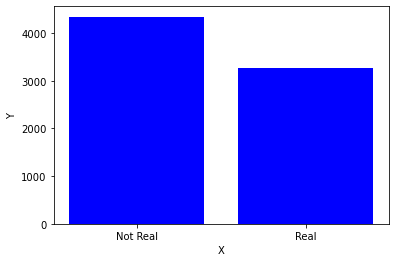

In [52]:
x = ['Not Real','Real']
y = train_data['target'].value_counts()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='blue')
plt.xlabel("X")
plt.ylabel("Y")

plt.xticks(x_pos, x)

plt.show()

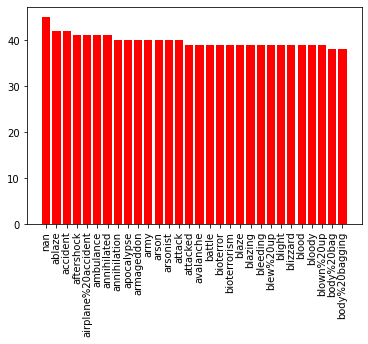

In [53]:
train_data['keyword'].unique()

x = train_data['keyword'].unique()[:30]
y = train_data['keyword'].value_counts()[:30]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='red')
plt.xticks(x_pos, x, rotation = 90)
plt.show()

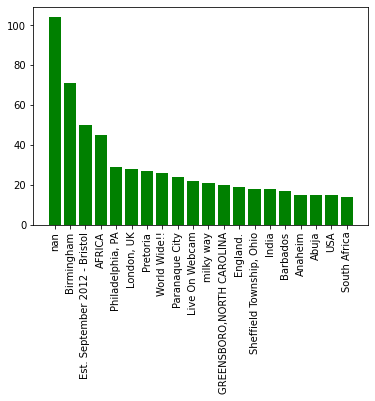

In [54]:
x = train_data['location'].unique()[:20]
y = train_data['location'].value_counts()[:20]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xticks(x_pos, x, rotation = 90)
plt.show()

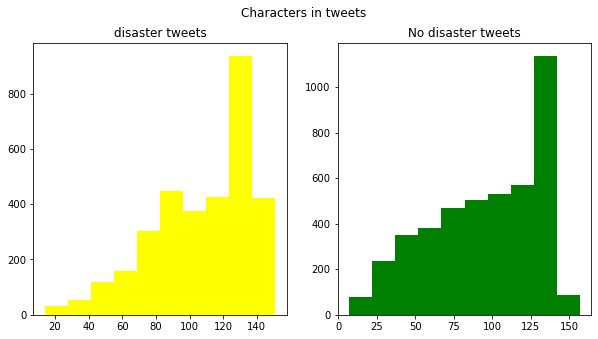

In [55]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = train_data[train_data['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color='yellow')
ax1.set_title('disaster tweets')

tweet_len = train_data[train_data['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color='green')
ax2.set_title('No disaster tweets')

fig.suptitle('Characters in tweets')
plt.show()

In [56]:
def create_corpus(target):
    corpus = []

    for x in train_data[train_data['target']== target]['text'].str.split():
        for word in x:
            corpus.append(word)
    return corpus

<BarContainer object of 10 artists>

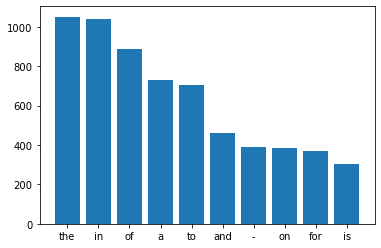

In [57]:
from collections import Counter
from collections import defaultdict

corpus_1 = create_corpus(1)
dic = defaultdict(int)

for word in corpus_1:
    if word in dic:
        dic[word] +=1
    else:
        dic[word] =1
        
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]

x,y = zip(*top)

plt.bar(x,y)

In [58]:
import re

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [59]:
def remove_URLs(text):
    url = re.compile(r'http?://\S+|www\.\S+')
    return url.sub(r'',text)

In [60]:
train_data['text'] = train_data['text'].apply(remove_URL)
test_data['text'] = test_data['text'].apply(remove_URL)

train_data['text'] = train_data['text'].apply(remove_URLs)
test_data['text'] = test_data['text'].apply(remove_URLs)

In [61]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [62]:
train_data['text'] = train_data['text'].apply(remove_emojis)
test_data['text'] = test_data['text'].apply(remove_emojis)

In [63]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"thx"   : "thanks"
}

In [64]:
def remove_contractions(text):
    return contractions[text.lower()] if text.lower() in contractions.keys() else text

In [65]:
train_data['text']  =train_data['text'].apply(remove_contractions)
test_data['text']=test_data['text'].apply(remove_contractions)

In [66]:
import string 

def remove_punctuations(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [67]:
train_data['text'] = train_data['text'].apply(remove_punctuations)
train_data['text'] = train_data['text'].apply(remove_punctuations)

In [68]:
freq = pd.Series(' '.join(train_data['text']).split()).value_counts()[:20]

print(freq)

the     2595
a       1874
to      1815
in      1777
of      1731
and     1313
I       1225
for      825
is       824
on       790
you      666
The      581
my       549
with     518
that     515
at       491
it       487
by       472
be       376
from     373
dtype: int64


In [69]:
freq_less = pd.Series(' '.join(train_data['text']).split()).value_counts()[-20:]
print(freq_less)

LindaSOCVAT            1
ant                    1
Disregard              1
effective              1
RSKarim1               1
tw4rw                  1
trollingtilMeekdiss    1
Lyme                   1
Sabrina                1
masterpiece            1
migraine               1
returning              1
30STM                  1
agrees                 1
p2                     1
Beth                   1
Donated                1
hosts                  1
Stuck                  1
4pm                    1
dtype: int64


In [70]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

new_stop_words = ['were', 'the', 'amp', 'dont', 'got', 'know', 'gon', 'na', 'wan', 'like', 'im', 'hers', 'why', 'over', "'d",'our', 'these', 'nevertheless', 'its', 'them', 'empty', 'how', 'whereas', 'whether', 'fifteen', 'about', 'four', 'give', 'otherwise', 'move', 'do', 'say', '‘ve', 'hence', 'n‘t', 'between', 'bottom', 'some', 'against', 'whole', 'i', 'into', 'they', 'already', 'she', 'either', 'an', 'both', 'him', 'due', 'using', 'five', 'across', 'front', 'in', 'off', 'only', 'really', 'twelve', 'twenty', 'show', 'whereupon', '‘m', 'n’t', 'himself', '’m', 'from', 'often', 'three', 'various', 'thereupon', 'should', 'put', 'take', 'who', 'above', 'their', 'been', 'towards', 'however', "n't", 'her', 'go', 'thereby', 'just', 'yourselves', 'become', 'thru', 'while', 'nowhere', 'neither', 'anyway', 'because', 'ca', 'which', 'moreover', 'forty', 'besides', 'us', 'more', 'third', 'wherein', 'whoever', 'used', 'every', 'whose', 'onto', 'your', 'hereafter', 'itself', 'sometimes', 'name', 'too', 'own', 'somewhere', 'there', 'we', 'you', '’ve', 'ourselves', 'sixty', 'would', 'first', 'must', 'whereafter', 'wherever', 'his', 'around', 'has', 'yours', 'became', 'doing','the', 'below', 'then', 'everyone', 'else', 'any', 'latterly', 'noone', 'part', 'might', "'ve", 'becoming', 'same', 'top', 'yourself', 'he', 'each', 'anyone', 'my', 'seeming', 'six', 'the', 'during', 'afterwards', 'throughout', 'formerly', 'seem', 'therefore', 'another', 'keep', 'without', 'being', 'can', 'had', 'per', "'s", 'other', 'side', '’s', 'also', 'herself', '’ll', 'eight', 'what', 'please', 'a', 'therein', 'back', 'me', 'never', 'not', 'does', 'enough', 'meanwhile', 'toward', 'even', 'get', 'and', 'it', 'perhaps', 'this', 'regarding', 'somehow', 'cannot', 'anyhow', 'through', 'whenever', 'thereafter', 'rather', 'by', 'still', 'where', 'than', 'made', 'of', 'will', 'within', 'are', 'amongst', 'although', 'former', 'full', 'nobody', 'was', 'to', 'is', 'at', 'hundred', 'all', 'on', 'such', 'after', 'almost', 'most', 'no', 'our', 'see', 'thus', 'upon', "'ll", 'whence', 'make', '‘s', 'could', 'quite', 'or', 'beyond', 'thence', 'mostly', 'though', 'alone', 'for', 'under', 'seemed', 'until', 'much', 'nine', 'least', 'that', 'nor', 'further', 'themselves', 'whatever', 'whom', 'anywhere', 'myself', 'eleven', 'none', 'with', 'as', 'have', '‘ll', "'m", 'up', 'if', 'several', 'whereby', 'now', 'always', 'amount', 'done', 'hereupon', 'others', 'may', 'one', 'everything', 'so', 'hereby', 'anything', 'fifty', 'last', 'am', 'beforehand', 'few', 'ever', 'together', 'unless', 'ten', 'behind', 'when', 'those', 'mine', 'everywhere', 'be', 'less', 'nothing', 'something', 'very', "'re", 'here', '‘re', 'since', 'seems', 'down', 'did', 'before', 'serious', '‘d', '’d', 'many', 'call', 'along', 'once', 'herein', 'out', 'namely', 'someone', 'becomes', 'whither', 're', 'two', 'but', 'again', 'elsewhere', 'well', 'next', 'sometime', 'indeed', 'ours', 'yet', '’re', 'via', 'latter', 'except', 'among', 'beside']

stop_words.update(new_stop_words)

In [71]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text) #remove text in squre backets
    text = re.sub('https?://\S+|www\.\S+','',text) #remove links
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [72]:
train_data['text'] = train_data['text'].apply(lambda x: clean_text(x))
test_data['text'] = test_data['text'].apply(lambda x: clean_text(x))

### tokenize the text

In [73]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_data['text'] = train_data['text'].apply(lambda x: tokenizer.tokenize(x))
test_data['text'] = test_data['text'].apply(lambda x: tokenizer.tokenize(x))

In [74]:
train_data['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

In [75]:
def remove_stop_words(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train_data['text'] = train_data['text'].apply(lambda x: remove_stop_words(x))
test_data['text'] =test_data['text'].apply(lambda x: remove_stop_words(x))


In [76]:
train_data['text'].head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [89]:
train = pd.read_csv("nlp-getting-started/train.csv")
test = pd.read_csv("nlp-getting-started/test.csv")

In [91]:
from nltk.tokenize import sent_tokenize, word_tokenize

tweets_train = train['text'].values
target = train['target'].values

tweets_test = test['text'].values

#### Lemmatizing and stemming the text

In [92]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for i in range(len(tweets_train)):
    sentences = sent_tokenize(tweets_train[i])
    
    word_list = []
    for sent in sentences:
        words = word_tokenize(sent)
        
        for word in words:
            if word not in word_list:
                word_list.append(word)
    word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
    tweets_train[i] = ' '.join(w for w in word_list)

In [81]:
for i in range(len(tweets_test)):
    sentences = sent_tokenize(tweets_test[i])
    
    word_list = []
    for sent in sentences:
        words = word_tokenize(sent)
        
        for word in words:
            if word not in word_list:
                word_list.append(word)
    word_list = [lemmatizer.lemmatize(w) for w in word_list if w not in stop_words]
    tweets_test[i] = ' '.join(w for w in word_list)

In [96]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
for i in range(len(tweets_train)):
    sentences = sent_tokenize(tweets_train[i])
    
    word_list = []
    for sent in sentences:
        words = word_tokenize(sent)
        
        for word in words:
            if word not in word_list:
                word_list.append(word)
    word_list = [porter.stem(w) for w in word_list if w not in stop_words]
    tweets_train[i] = ' '.join(w for w in word_list)

In [98]:
for i in range(len(tweets_test)):
    sentences = sent_tokenize(tweets_test[i])
    
    word_list = []
    for sent in sentences:
        words = word_tokenize(sent)
        
        for word in words:
            if word not in word_list:
                word_list.append(word)
    word_list = [porter.stem(w) for w in word_list if w not in stop_words]
    tweets_test[i] = ' '.join(w for w in word_list)

In [102]:
def combine_text(list_of_text):
    combined_text = ''.join(list_of_text)
    return combined_text

In [103]:
train['text'] = train['text'].apply(lambda x : combine_text(x))
test['text'] = test['text'].apply(lambda x : combine_text(x))
train['text']
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason # earthquak allah forgiv,1
1,4,NaN,NaN,forest fire near La rong sask . canada,1
2,5,NaN,NaN,resid ask 'shelter place ' notifi offic . No e...,1
3,6,NaN,NaN,"13,000 peopl receiv # wildfir evacu order cali...",1
4,7,NaN,NaN,sent photo rubi # alaska smoke wildfir pour sc...,1


In [104]:
train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,giant crane hold bridg collap nearbi home http...,1
7609,10870,NaN,NaN,@ aria_ahrari thetawniest control wild fire ca...,1
7610,10871,NaN,NaN,m1.94 [ 01:04 utc ] ? 5km S volcano hawaii . h...,1
7611,10872,NaN,NaN,polic investig e-bik collid car littl portug ....,1
7612,10873,NaN,NaN,latest : home raze northern california wildfir...,1


In [105]:
train['text'][:1]

0    deed reason # earthquak allah forgiv
Name: text, dtype: object

### Modelisation

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

train_vectors = count_vectorizer.fit_transform(train['text'])
test_vectors = count_vectorizer.transform(test["text"])

In [109]:
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [116]:
import xgboost  as xgb
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV

GridSearchCV is a library function that is a member of sklearn’s model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [117]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(train['text'])
test_tfidf = tfidf.transform(test["text"])

In [ ]:
# Fitting a simple Logistic Regression on Counts
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=5, scoring="f1")
scores.mean()